<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [6]:
!pip install pandas
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
conn = sqlite3.connect(':memory:')
df.to_sql('main', conn, index=False, if_exists='replace')

65437


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




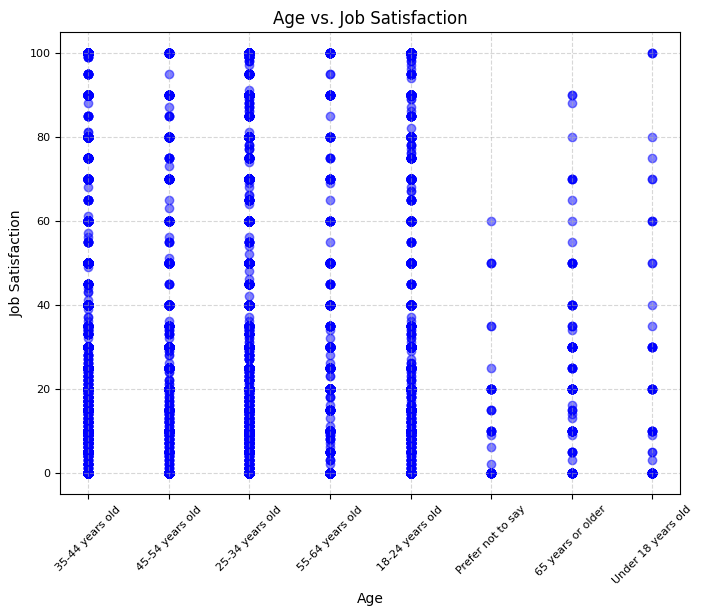

In [10]:
QUERY_1 = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_age_jobsat = pd.read_sql_query(QUERY_1, conn)

plt.figure(figsize=(8,6))
plt.scatter(df_age_jobsat['Age'], df_age_jobsat['JobSatPoints_6'], alpha=0.5, color='blue')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Job Satisfaction', fontsize=10)
plt.title('Age vs. Job Satisfaction', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


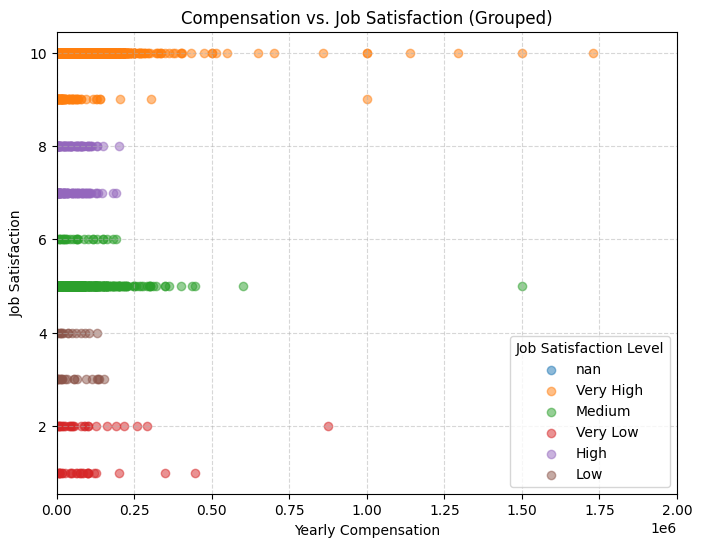

In [15]:
QUERY_2 = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_comp_jobsat = pd.read_sql_query(QUERY_2, conn)

df_comp_jobsat['JobSatGroup'] = pd.cut(
    df_comp_jobsat['JobSatPoints_6'],
    bins=[0, 2, 4, 6, 8, 10],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

plt.figure(figsize=(8,6))
colors = {'Very Low':'red', 'Low':'orange', 'Medium':'yellow', 'High':'green', 'Very High':'blue'}
for group in df_comp_jobsat['JobSatGroup'].unique():
    subset = df_comp_jobsat[df_comp_jobsat['JobSatGroup'] == group]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], 
                label=group, alpha=0.5)

plt.xlabel('Yearly Compensation', fontsize=10)
plt.ylabel('Job Satisfaction', fontsize=10)
plt.title('Compensation vs. Job Satisfaction (Grouped)', fontsize=12)
plt.legend(title='Job Satisfaction Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0,2000000)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


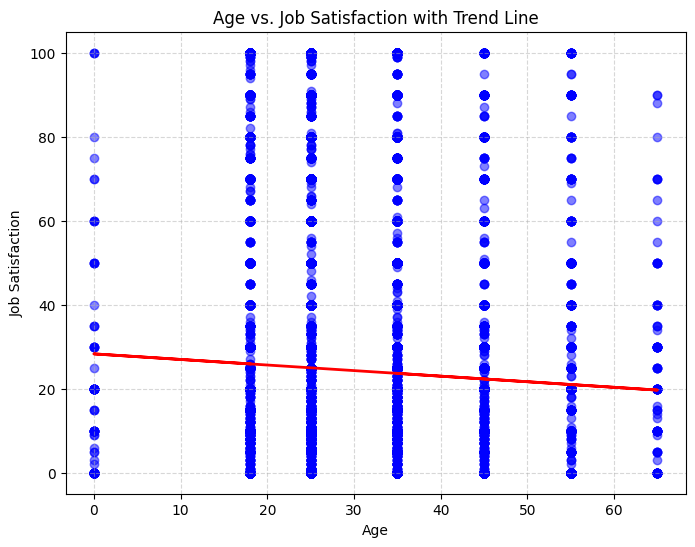

In [26]:
QUERY_3 = """
SELECT 
    CAST(substr(Age, 1, instr(Age, ' ') - 1) AS INTEGER) AS Age,
    CAST(JobSatPoints_6 AS REAL) AS JobSatPoints_6
FROM main
WHERE Age IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
  AND Age LIKE '% %'
"""
df_age_jobsat_clean = pd.read_sql_query(QUERY_3, conn)

df_age_jobsat_clean = df_age_jobsat_clean.dropna(subset=['Age', 'JobSatPoints_6'])

x = df_age_jobsat_clean['Age']
y = df_age_jobsat_clean['JobSatPoints_6']

import numpy as np
coeff = np.polyfit(x, y, 1)
trend = np.poly1d(coeff)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.5, color='blue')
plt.plot(x, trend(x), color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction with Trend Line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


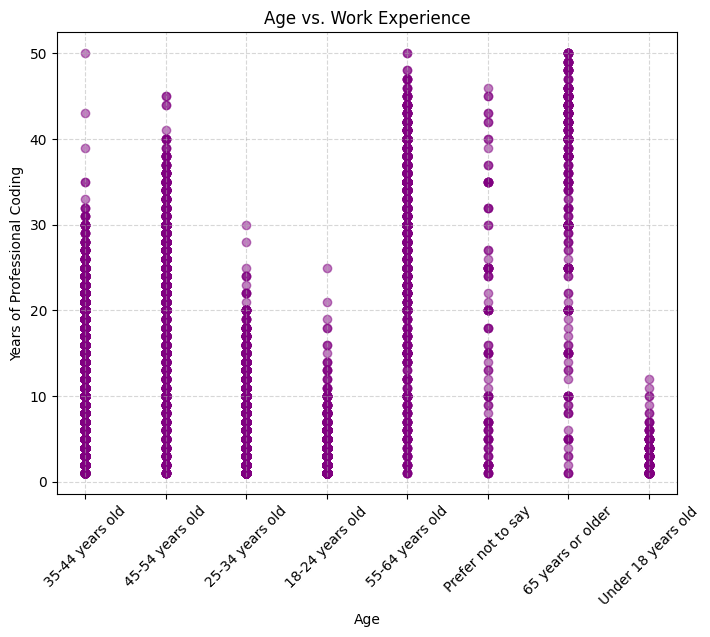

In [28]:
QUERY_4 = """
SELECT Age, CAST(YearsCodePro AS INTEGER) AS YearsCodePro
FROM main
WHERE Age IS NOT NULL AND YearsCodePro GLOB '[0-9]*'
"""
df_age_exp = pd.read_sql_query(QUERY_4, conn)

plt.figure(figsize=(8,6))
plt.scatter(df_age_exp['Age'], df_age_exp['YearsCodePro'], alpha=0.5, color='purple')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.title('Age vs. Work Experience')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation = 45)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



# SQL query: Compensation, Job Satisfaction, and numeric Age
QUERY_5 = """
SELECT 
    CAST(ConvertedCompYearly AS REAL) AS ConvertedCompYearly,
    CAST(JobSatPoints_6 AS REAL) AS JobSatPoints_6,
    CAST(substr(Age, 1, instr(Age, ' ') - 1) AS INTEGER) AS Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
  AND Age LIKE '% %'
"""
df_bubble = pd.read_sql_query(QUERY_5, conn)

# Drop any remaining invalid rows
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly','JobSatPoints_6','Age'])

# Plot bubble chart
plt.figure(figsize=(8,6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['Age']*2,  # bubble size proportional to Age
    alpha=0.5,
    color='teal'
)
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction (Bubble size = Age)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

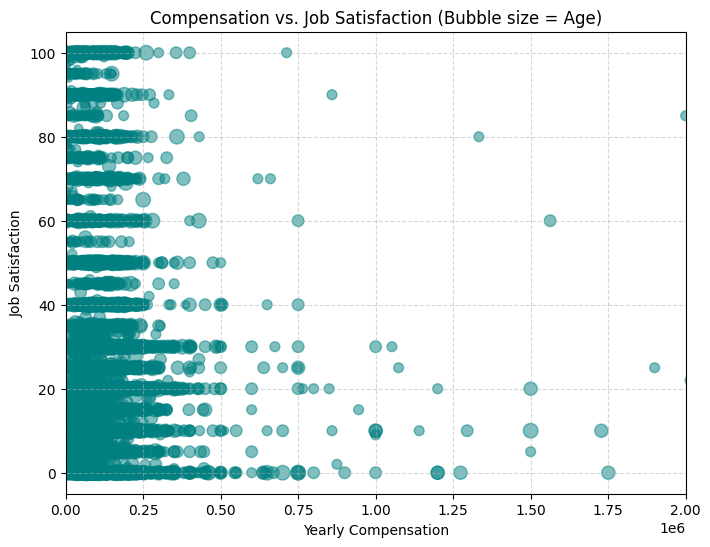

In [31]:
# SQL query: Compensation, Job Satisfaction, and numeric Age
QUERY_5 = """
SELECT 
    CAST(ConvertedCompYearly AS REAL) AS ConvertedCompYearly,
    CAST(JobSatPoints_6 AS REAL) AS JobSatPoints_6,
    CAST(substr(Age, 1, instr(Age, ' ') - 1) AS INTEGER) AS Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
  AND Age LIKE '% %'
"""
df_bubble = pd.read_sql_query(QUERY_5, conn)

# Drop any remaining invalid rows
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly','JobSatPoints_6','Age'])

# Plot bubble chart
plt.figure(figsize=(8,6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['Age']*2,  # bubble size proportional to Age
    alpha=0.5,
    color='teal'
)
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction (Bubble size = Age)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim (0,2000000)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
QUERY_6 = """
SELECT LanguageHaveWorkedWith, JobSatPoints_6
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_lang_jobsat = pd.read_sql_query(QUERY_6, conn)

plt.figure(figsize=(12,6))
# For multiple languages per respondent, split by semicolon if needed
plt.scatter(df_lang_jobsat['LanguageHaveWorkedWith'], df_lang_jobsat['JobSatPoints_6'], alpha=0.5, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Programming Languages')
plt.ylabel('Job Satisfaction')
plt.title('Programming Languages vs. Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [ ]:
QUERY_7 = """
SELECT ConvertedCompYearly, JobSatPoints_6, Employment
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND Employment IS NOT NULL
"""
df_comp_emp = pd.read_sql_query(QUERY_7, conn)

plt.figure(figsize=(8,6))
employment_types = df_comp_emp['Employment'].unique()
colors = plt.cm.tab10(range(len(employment_types)))

for i, emp in enumerate(employment_types):
    subset = df_comp_emp[df_comp_emp['Employment'] == emp]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], alpha=0.5, label=emp, color=colors[i])

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
QUERY_exp_age_country = """
SELECT 
    CAST(substr(Age, 1, instr(Age, ' ') - 1) AS INTEGER) AS Age,
    CAST(YearsCodePro AS INTEGER) AS YearsCodePro,
    Country
FROM main
WHERE Age LIKE '% %'
  AND YearsCodePro GLOB '[0-9]*'
  AND Country IS NOT NULL
"""
df_exp_age_country = pd.read_sql_query(QUERY_exp_age_country, conn)

df_exp_age_country = df_exp_age_country.dropna(subset=['Age','YearsCodePro','Country'])

df_exp_age_country['AgeGroup'] = pd.cut(
    df_exp_age_country['Age'], 
    bins=[0,25,35,45,55,65,100], 
    labels=['<25','25-35','35-45','45-55','55-65','65+']
)

countries = df_exp_age_country['Country'].unique()
age_groups = df_exp_age_country['AgeGroup'].unique()
colors = plt.cm.tab20(range(len(countries)))
markers = ['o','s','^','D','v','P']

plt.figure(figsize=(12,6))

for i, country in enumerate(countries):
    for j, age_group in enumerate(age_groups):
        subset = df_exp_age_country[
            (df_exp_age_country['Country'] == country) & 
            (df_exp_age_country['AgeGroup'] == age_group)
        ]
        if not subset.empty:
            plt.scatter(
                subset['Age'],
                subset['YearsCodePro'],
                color=colors[i],
                marker=markers[j % len(markers)],
                alpha=0.6,
                label=f"{country} - {age_group}"
            )

plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.title('Work Experience vs. Age by Country and Age Group')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
